# Exploratory Data Analysis - Mohamed Salah

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame 

In [ ]:
df = pd.read_csv('/work/salah-clean.csv')
df

,match,competition,date,position,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
0,Real Madrid - Liverpool 1:0,Europe. UEFA Champions League,3/15/23,RWF,96,64,36,56,0,0,...,2,0,0,1,11,2,18,3,2,67
1,Liverpool - Real Madrid 2:5,Europe. UEFA Champions League,2/21/23,"CF, RWF",96,73,40,55,1,1,...,0,0,0,0,10,1,10,2,2,100
2,Liverpool - Napoli 2:0,Europe. UEFA Champions League,11/1/22,RWF,101,61,33,54,1,0,...,2,0,0,1,13,1,8,1,1,100
3,Ajax - Liverpool 0:3,Europe. UEFA Champions League,10/26/22,CF,94,47,23,49,1,1,...,0,0,0,1,8,2,25,2,1,50
4,Rangers - Liverpool 1:7,Europe. UEFA Champions League,10/12/22,CF,24,11,9,82,3,0,...,0,0,0,0,1,0,0,0,0,0
5,Liverpool - Rangers 2:0,Europe. UEFA Champions League,10/4/22,"CF, RAMF",94,82,53,65,1,0,...,1,0,0,1,8,0,0,3,3,100
6,Liverpool - Ajax 2:1,Europe. UEFA Champions League,9/13/22,RWF,96,58,28,48,1,0,...,1,1,100,1,10,1,10,1,1,100
7,Napoli - Liverpool 4:1,Europe. UEFA Champions League,9/7/22,RWF,64,28,14,50,0,0,...,1,0,0,0,6,1,17,0,0,0
8,Liverpool - Real Madrid 0:1,Europe. UEFA Champions League,5/28/22,"RAMF, RWF",100,84,53,63,0,0,...,1,1,100,2,13,0,0,4,3,75
9,Villarreal - Liverpool 2:3,Europe. UEFA Champions League,5/3/22,RWF,94,50,24,48,0,1,...,1,1,100,0,6,3,50,3,2,67


In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     25 non-null     object 
 1   competition               25 non-null     object 
 2   date                      25 non-null     object 
 3   position                  25 non-null     object 
 4   minutes_played            25 non-null     int64  
 5   total_actions             25 non-null     int64  
 6   total_actions_successful  25 non-null     int64  
 7   TAS_percent               25 non-null     int64  
 8   goals                     25 non-null     int64  
 9   assists                   25 non-null     int64  
 10  shots                     25 non-null     int64  
 11  shots_on_target           25 non-null     int64  
 12  SOT_percent               25 non-null     int64  
 13  xG                        25 non-null     float64
 14  passes      

In [ ]:
# Row & Columns 
print(df.shape)

(25, 39)


In [ ]:
# Looking for null or missing values
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

In [ ]:
df.describe()

,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,shots,shots_on_target,SOT_percent,xG,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.000000,25.000000,...,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,84.240000,61.560000,34.360000,56.480000,0.760000,0.160000,3.0,1.640000,51.120000,0.629600,...,1.080000,0.24000,18.320000,1.000000,9.480000,1.240000,13.920000,2.32000,1.880000,72.920000
std,20.238742,19.767566,12.556141,9.229121,0.778888,0.374166,1.5,1.380821,34.396366,0.445613,...,1.077033,0.43589,37.262269,0.912871,3.820122,1.267544,14.215367,1.54704,1.394035,33.570721
min,24.000000,11.000000,9.000000,41.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,73.000000,49.000000,28.000000,49.000000,0.000000,0.000000,2.0,1.000000,33.000000,0.280000,...,0.000000,0.00000,0.000000,0.000000,8.000000,0.000000,0.000000,1.00000,1.000000,50.000000
50%,94.000000,64.000000,34.000000,56.000000,1.000000,0.000000,3.0,2.000000,50.000000,0.530000,...,1.000000,0.00000,0.000000,1.000000,10.000000,1.000000,10.000000,2.00000,2.000000,80.000000
75%,96.000000,76.000000,37.000000,63.000000,1.000000,0.000000,3.0,2.000000,67.000000,0.790000,...,2.000000,0.00000,0.000000,1.000000,13.000000,2.000000,23.000000,3.00000,2.000000,100.000000
max,102.000000,103.000000,68.000000,82.000000,3.000000,1.000000,8.0,6.000000,100.000000,1.520000,...,4.000000,1.00000,100.000000,4.000000,16.000000,5.000000,50.000000,6.00000,6.000000,100.000000


## Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

RWF          18
CF, RWF       3
CF            2
RAMF, RWF     1
CF, RAMF      1
Name: position, dtype: int64
RWF        18
CF, RWF     3
CF          2
Name: position, dtype: int64
7.666666666666667


- RWF (Right Wing Forward): The RWF, or Right Wing Forward, is an attacking position primarily located on the right side of the forward line. This position is often associated with players who possess speed, agility, and excellent dribbling skills. The RWF's main objective is to provide width to the team's attack on the right flank and create scoring opportunities. They typically stay close to the touchline, making runs down the right wing and using their pace to beat defenders. The RWF often looks to deliver crosses into the box or cut inside onto their favored foot to take shots on goal. Their combination of attacking flair, creativity, and goal-scoring ability makes them an exciting and influential presence in the team's offensive play.

- CF, RWF (Center Forward, Right Wing Forward): CF, RWF refers to a tactical arrangement where a player is deployed as a Center Forward (CF) but also has the ability to play as a Right Wing Forward (RWF) when needed. This player operates as the main striker and central point of the attack but can also drift towards the right-wing position during the game. They may be asked to adapt their positioning based on the team's tactics, opposition's weaknesses, or specific game situations. This versatile role requires the player to possess the attributes of both a traditional striker and a winger, including goal-scoring ability, hold-up play, and the skills to beat defenders on the flank.

- CF (Center Forward): The CF, or Center Forward, is an attacking position that is often positioned centrally in the forward line. The main role of the CF is to score goals and create scoring opportunities for the team. They are the primary target for crosses, through balls, and attacking moves. The CF should have excellent shooting accuracy, finishing ability, and a good sense of timing to capitalize on goal-scoring opportunities. In addition to scoring goals, the CF also plays a crucial role in linking up play, making runs to stretch the opposition's defense, and providing support to attacking midfielders and wingers.

These positions in football are key to a team's offensive strategies, with each role contributing to the team's goal-scoring prowess and overall attacking play. A versatile player who can fulfill the responsibilities of both a traditional striker and a winger can offer tactical flexibility and a greater threat in the attacking third of the field.

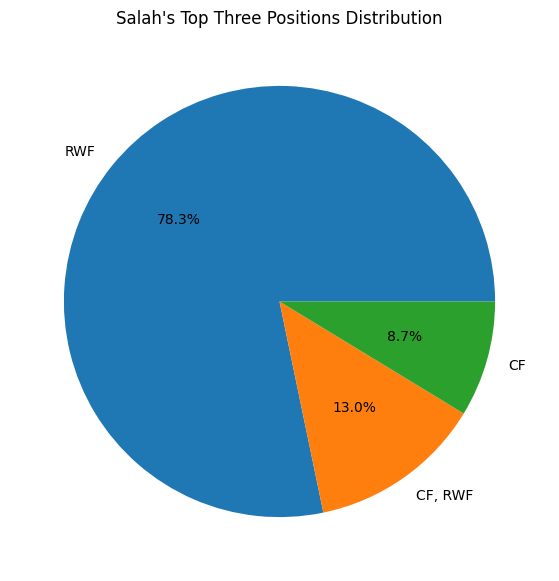

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Salah's Top Three Positions Distribution")
plt.show()

## Average Minutes Played

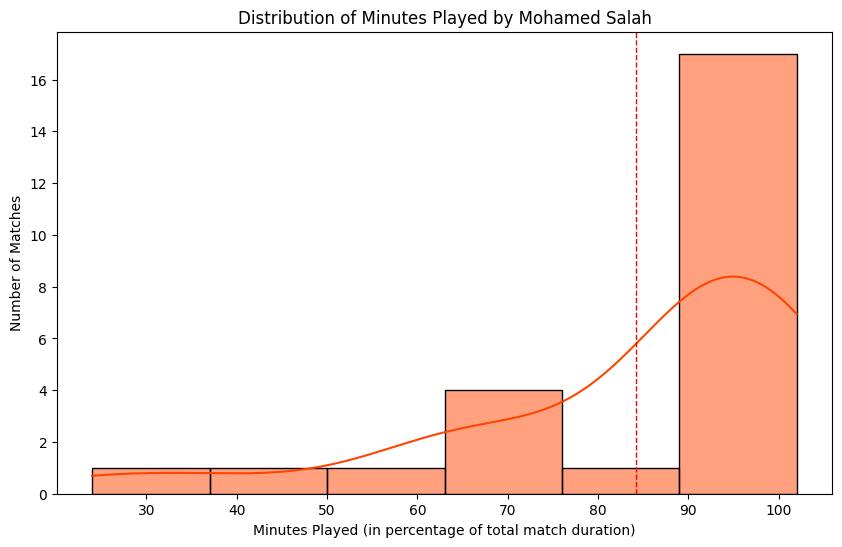

Mohamed Salah played on average 84.24 minutes per match.


In [ ]:
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='orangered')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Mohamed Salah')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Mohamed Salah played on average {average_minutes_played} minutes per match.")

## Interceptions

Mohamed Salah has an average of 1.0 interceptions per match.
The minimum interceptions in a match by Mohamed Salah is 0.
The maximum interceptions in a match by Mohamed Salah is 4.


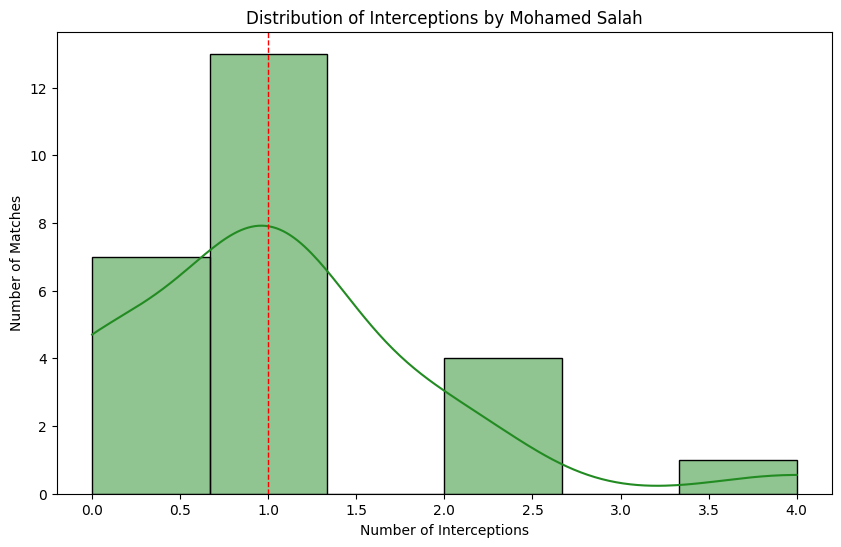

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Mohamed Salah has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Mohamed Salah is {min_interceptions}.")
print(f"The maximum interceptions in a match by Mohamed Salah is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='forestgreen')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Mohamed Salah')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

- The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$

In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'duels_won', 'aerial_duels_won','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: 0.8689456473922572
Kurtosis of passes_accurate: 0.8391879089485563
Kurtosis of long_passes_accurate: 0.6093633754915517
Kurtosis of duels_won: 0.9407135827013962
Kurtosis of aerial_duels_won: -0.5175438596491229
Kurtosis of losses_own_half: 1.1855469086276065
Kurtosis of recoveries_opp_half: 1.3158075136294478


- total_actions_successful (0.869): This value suggests that Salah's successful actions in games are consistently high without much variation, indicating he is a reliable player who frequently contributes to the game's positive outcomes.

- passes_accurate (0.839): This low kurtosis indicates that Salah is consistently accurate in his passing, rarely having games where his passing accuracy dramatically differs from his average. This shows he is a dependable player in terms of maintaining possession and making effective plays.

- long_passes_accurate (0.609): Similar to the previous point, this shows consistency in Salah's long-passing ability. He maintains a steady performance in making accurate long passes, which is crucial for setting up goal-scoring opportunities.

- duels_won (0.941): Salah consistently comes out successful in duels, indicating that he's effective in one-on-one situations, a key quality for maintaining possession and advancing the game.

- aerial_duels_won (-0.518): The negative kurtosis suggests a more flat distribution. Salah has a varied performance in aerial duels, indicating he wins these at a variable rate. His performance in aerial duels might be an area where unpredictability is more common.

- losses_own_half (1.186): The kurtosis here suggests that there is consistency, but with a bit more variation in how often Salah loses possession in his own half compared to other attributes. Despite this, the variation is still less than what you'd expect in a normal distribution.

- recoveries_opp_half (1.316): This indicates that Salah regularly recovers the ball in the opposition's half, though there's a bit more variation here compared to some of the other attributes. Nevertheless, this is an essential skill for a forward player, helping to keep pressure on the opposition and create scoring opportunities.

In summary, the kurtosis values reveal that Salah is generally a consistent player across various game aspects, with relatively few outliers in his performance data. His strongest consistency lies in total successful actions, accurate passes, and duels won. His aerial duels won is the most variable aspect of his game, while his ball losses and recoveries in respective halves have a bit more variation compared to his other skills but are still less varied than a typical normal distribution.

## Features Normalization

### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$


Leptokurtic variables normalized:
   losses_own_half  recoveries_opp_half
0         0.611949             0.087856
1        -0.193247             0.087856
2        -0.193247            -0.644278
3         0.611949            -0.644278
4        -0.998443            -1.376412

Platykurtic variables normalized:
   aerial_duels_won
0         -0.561951
1         -0.561951
2         -0.561951
3         -0.561951
4         -0.561951

Mesokurtic variables normalized:
   total_actions_successful  passes_accurate  long_passes_accurate  duels_won
0                  0.133307         0.507434             -0.646162  -0.425626
1                  0.458445         0.292420              1.148733   0.756668
2                 -0.110547        -0.352624              1.148733   0.165521
3                 -0.923393        -0.890160             -0.646162  -0.721199
4                 -2.061377        -2.395261             -0.646162  -1.312346


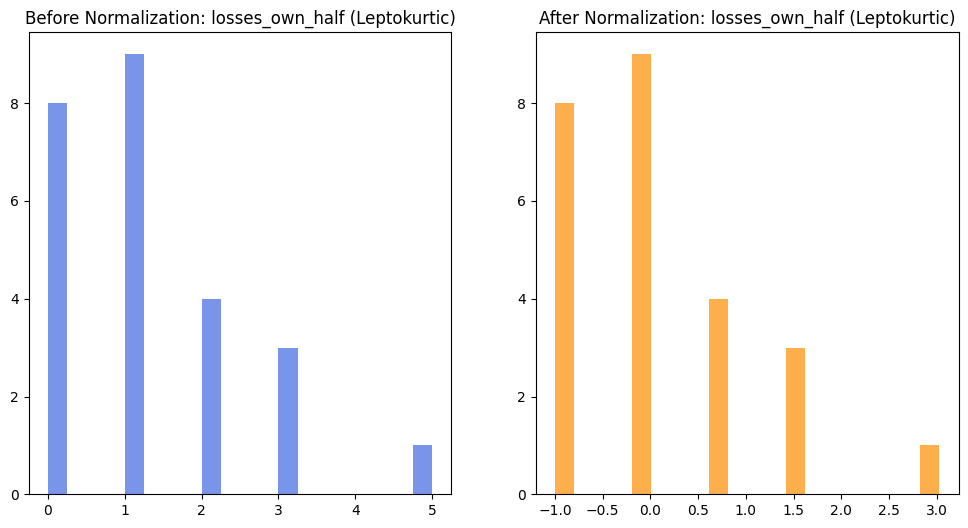

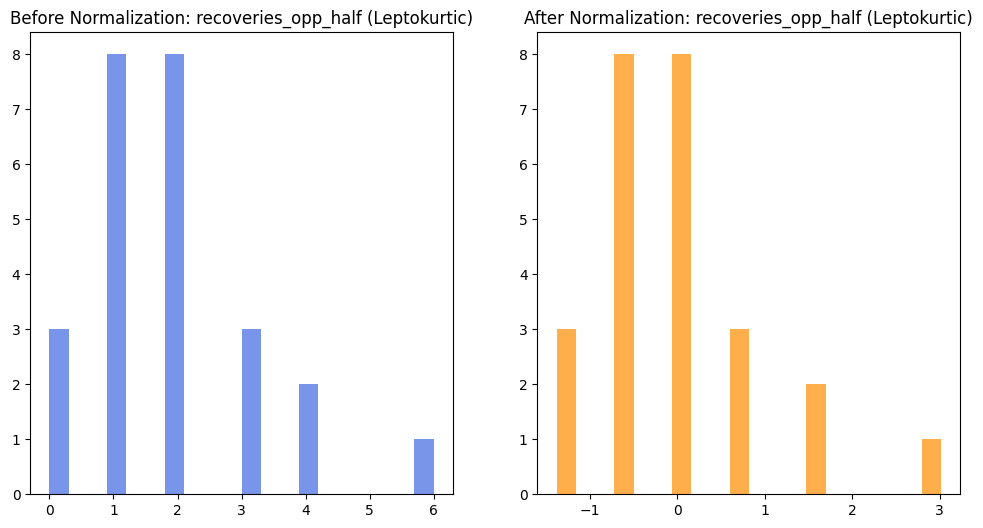

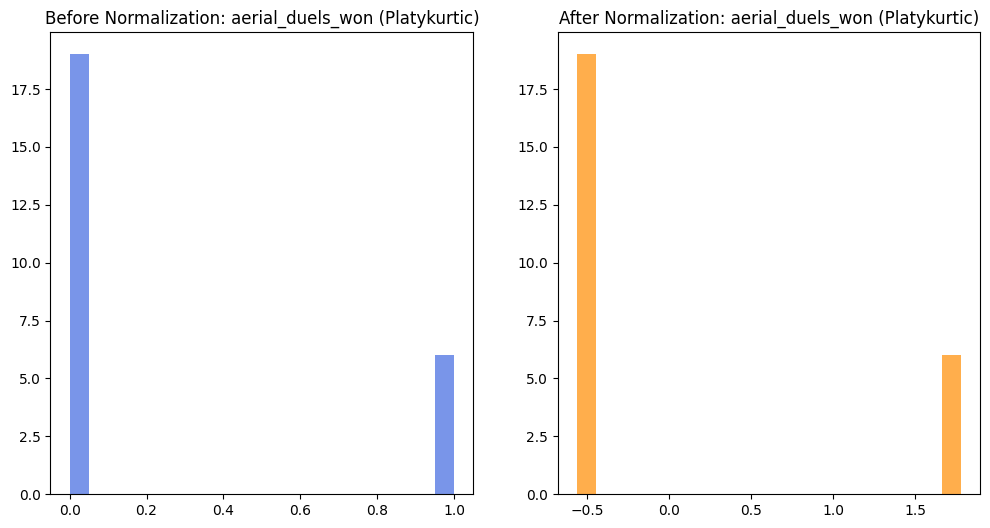

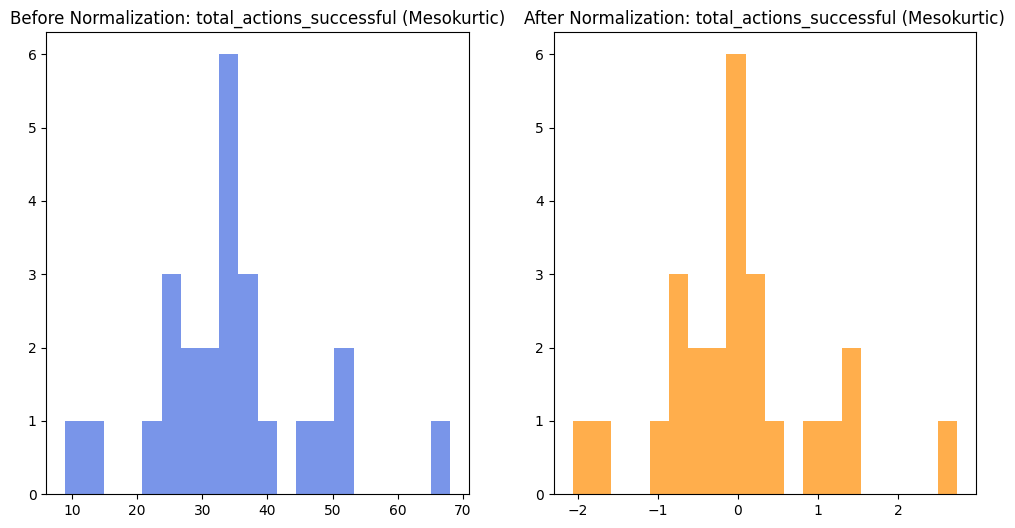

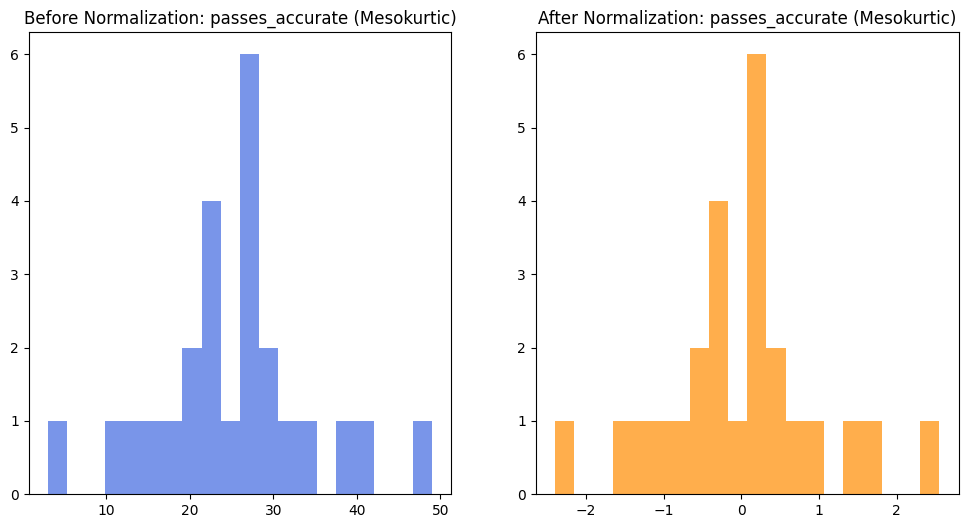

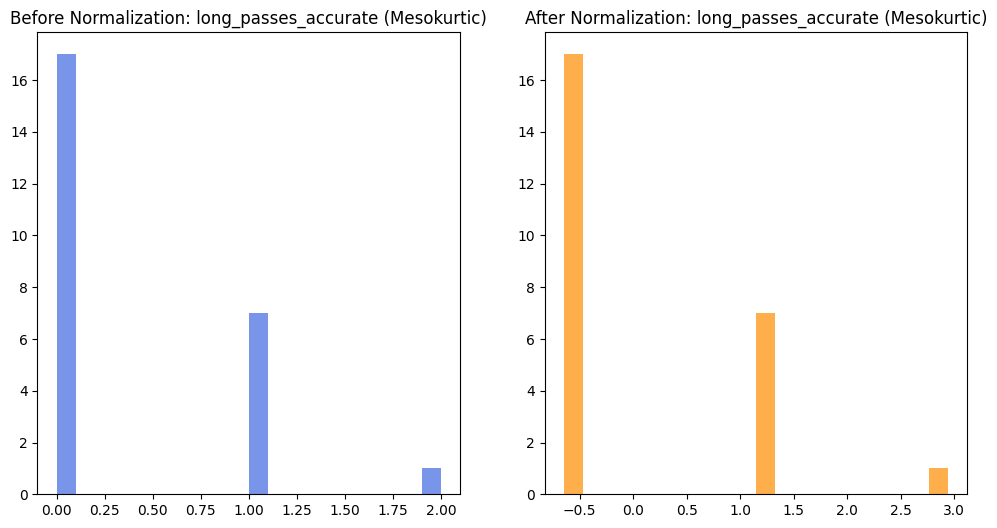

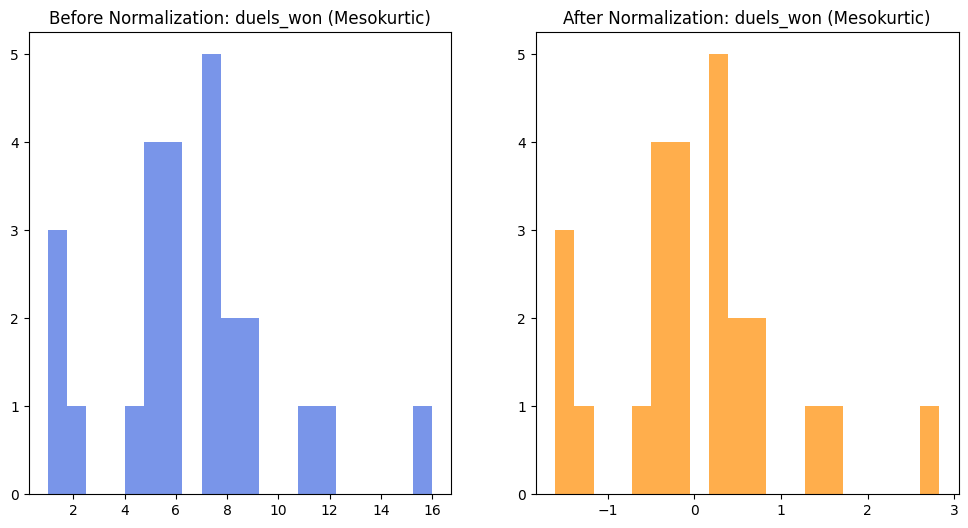

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
leptokurtic_variables = df[['losses_own_half', 'recoveries_opp_half']]
platykurtic_variables = df[['aerial_duels_won']]
mesokurtic_variables = df[['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'duels_won']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the leptokurtic variables
leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

# Normalize the platykurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

# Normalize the mesokurtic variables
mesokurtic_variables_normalized = scaler.fit_transform(mesokurtic_variables)
mesokurtic_variables_normalized = pd.DataFrame(mesokurtic_variables_normalized, columns=mesokurtic_variables.columns)

# Print the normalized data
print("Leptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())

print("\nMesokurtic variables normalized:")
print(mesokurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
for group_name, group, group_normalized in [('Leptokurtic', leptokurtic_variables, leptokurtic_variables_normalized), 
                                            ('Platykurtic', platykurtic_variables, platykurtic_variables_normalized), 
                                            ('Mesokurtic', mesokurtic_variables, mesokurtic_variables_normalized)]:
    for col in group.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(group[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({group_name})')

        plt.subplot(1,2,2)
        plt.hist(group_normalized[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({group_name})')

        plt.show()

## Sampling statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values fall from the regression line. Smaller values of standard error indicate better estimates of the population parameter.

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$


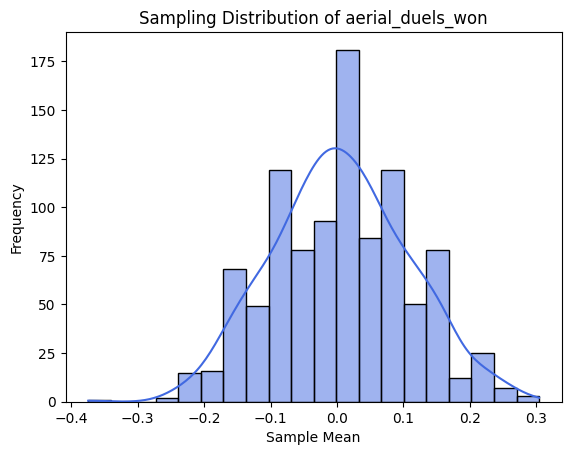

Sample Mean of aerial_duels_won: 0.005174636608988834
Standard Error of aerial_duels_won: 0.0032630961326525973


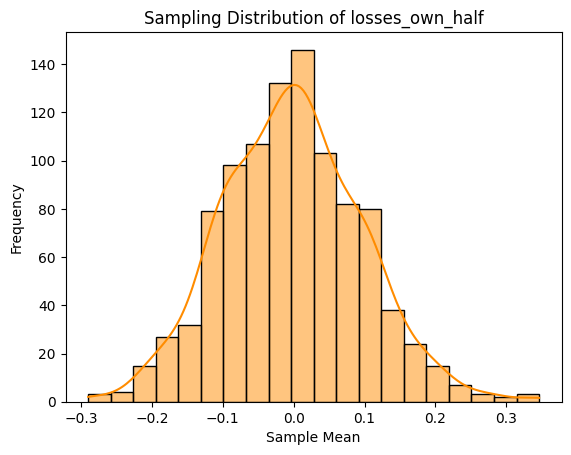

Sample Mean of losses_own_half: -0.0020613012044826576
Standard Error of losses_own_half: 0.0031147039733211146


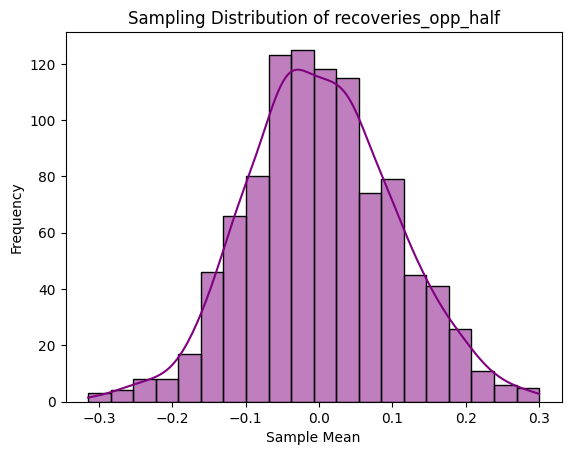

Sample Mean of recoveries_opp_half: 0.0025331845597434234
Standard Error of recoveries_opp_half: 0.0031862537391771605


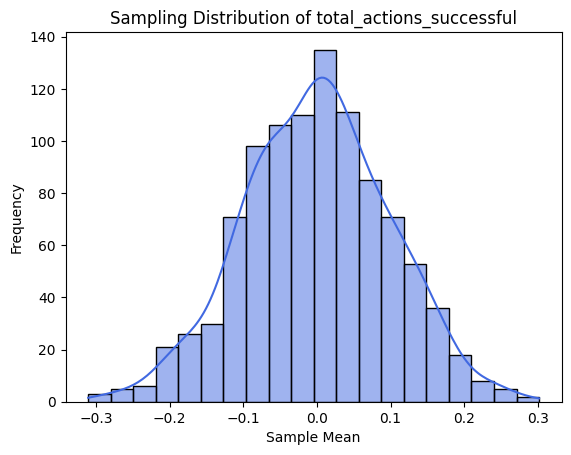

Sample Mean of total_actions_successful: -0.0002210940817305742
Standard Error of total_actions_successful: 0.0031264813331913052


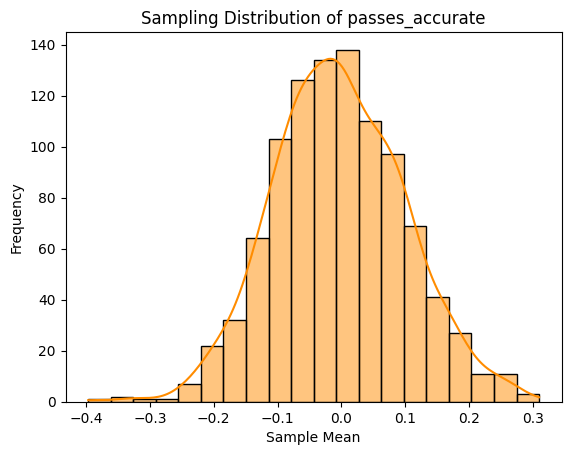

Sample Mean of passes_accurate: -0.003890687163333764
Standard Error of passes_accurate: 0.003239424523951102


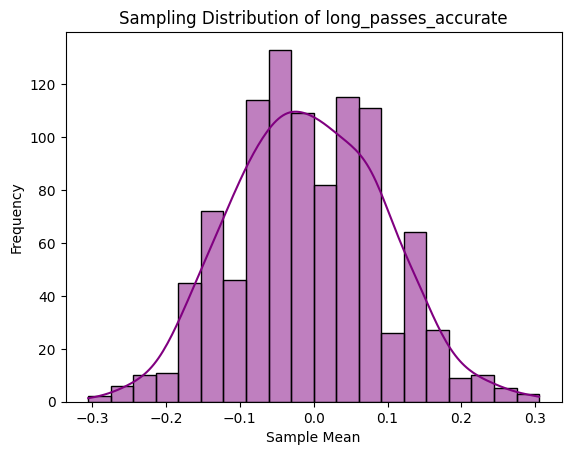

Sample Mean of long_passes_accurate: -0.007269326356004663
Standard Error of long_passes_accurate: 0.003209348555811408


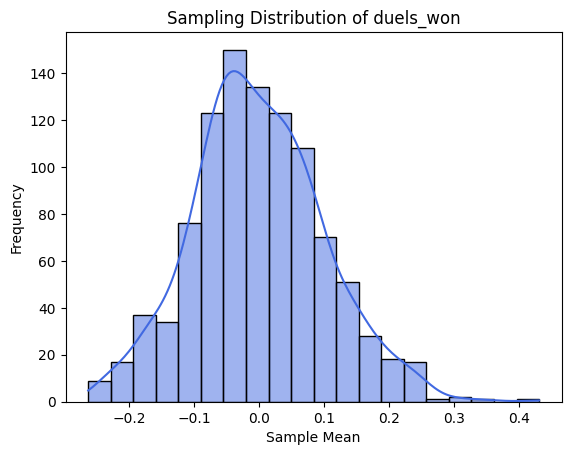

Sample Mean of duels_won: -0.0009133222127791689
Standard Error of duels_won: 0.003189107826367717


In [ ]:
from scipy.stats import sem

# Combine all the features
features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns)
colors = ['royalblue', 'darkorange', 'purple']

all_features_normalized = pd.concat([platykurtic_variables_normalized, leptokurtic_variables_normalized, mesokurtic_variables_normalized], axis=1)

for index, feature in enumerate(features):
    sample_means = []
    for _ in range(1000):
        sample = all_features_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=colors[index%3], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Standard Error of {feature}:', standard_error)

Starting with aerial duels won, the sample mean being negative suggests that Salah might not be as effective in winning aerial duels as the average player in the sample. However, the standard error being small indicates our estimate is precise. On football optics, this means Salah is not typically the player you'd target with aerial balls due to his relatively lower success rate in these challenges.

For losses in own half, the positive sample mean implies that Salah loses the ball more often in his own half than the average player in our sample. The small standard error again gives us confidence in this estimate. On football optics, this suggests that Salah might be a risk when it comes to retaining possession in his own half, possibly due to aggressive play or attempting difficult maneuvers.

Regarding recoveries in the opponent's half, the positive sample mean suggests Salah is more likely to recover the ball in the opponent's half than the average player. The standard error, although small, is larger than the sample mean, indicating a slightly less confident estimate. On football optics, this indicates that Salah is proactive in pressuring opponents and reclaiming the ball, contributing to Liverpool's high-pressing strategy.

The sample mean of total actions successful being negative indicates that Salah might have a lower success rate for his total actions compared to the average player. However, the standard error being small gives us a certain level of confidence in our estimate. On football optics, this may mean that Salah is either attempting riskier plays or having issues with execution, leading to a lower overall success rate.

With respect to accurate passes, the negative sample mean suggests that Salah might have fewer accurate passes than the average player. The standard error being small allows us to trust this estimate. On football optics, this might suggest that Salah may need to improve his pass accuracy to better support his team's build-up play.

When it comes to accurate long passes, the barely positive sample mean indicates that Salah's accuracy with long passes is around the average. The small standard error assures us of the precision of our estimate. On football optics, this could mean that while Salah isn't particularly adept at long passes, he's not a liability in this aspect either.

Lastly, regarding duels won, the extremely small but positive sample mean suggests that Salah's success rate in duels is very close to the average player's. With the small standard error, we can trust our estimate. On football optics, this indicates that Salah is competent in one-on-one situations, an essential trait for a player in his position. 

## Central Limit Theorem 

- The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$


- On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

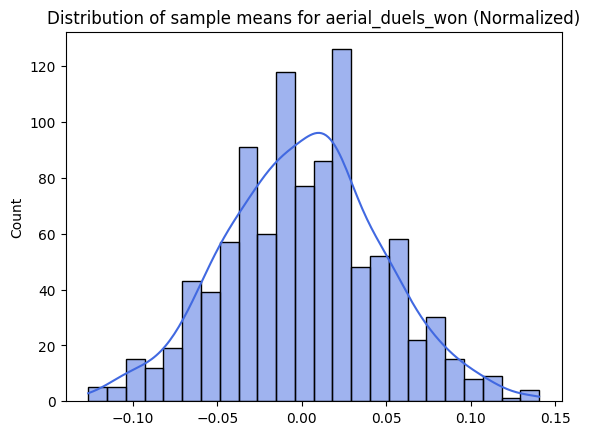

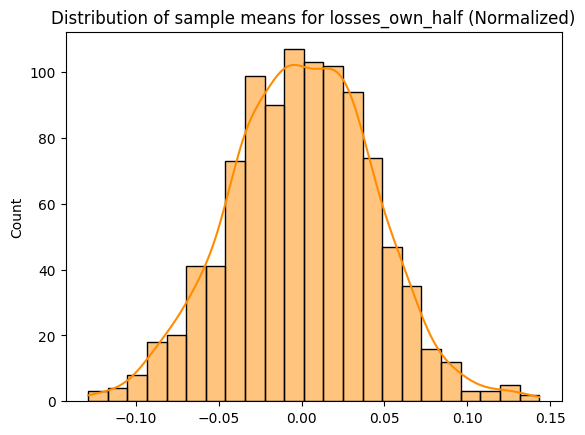

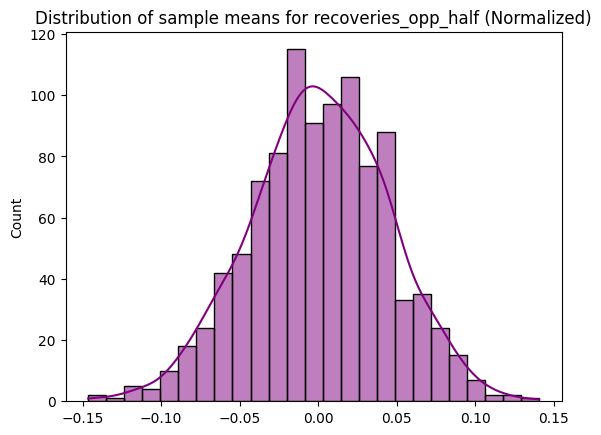

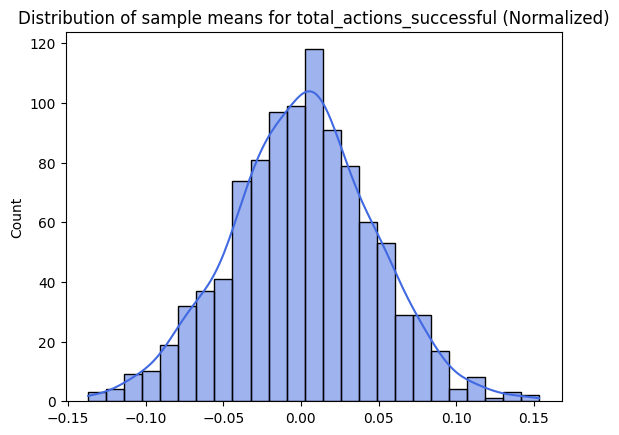

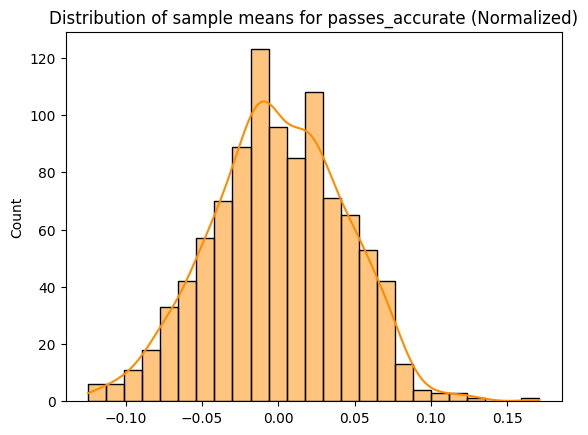

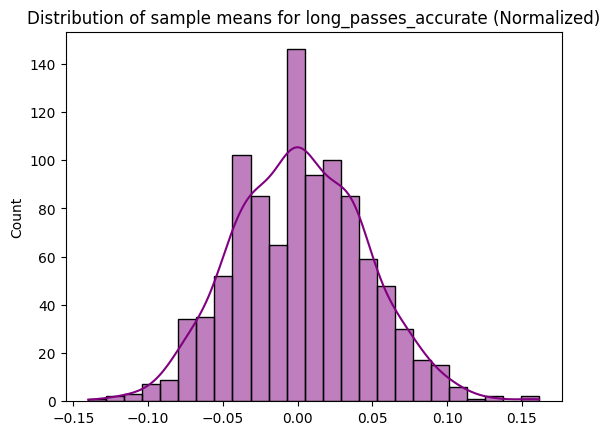

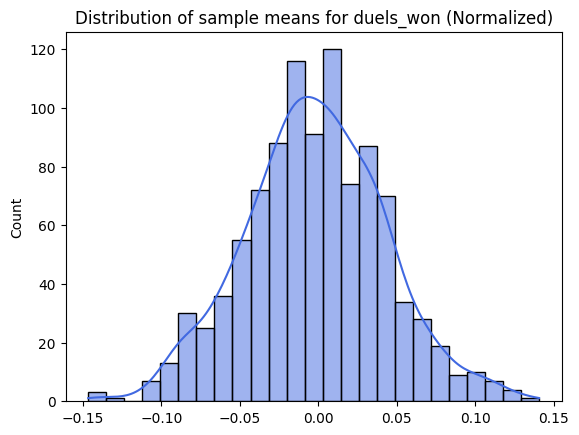

In [ ]:
# Merging normalized datasets into a single one
normalized_df = pd.concat([platykurtic_variables_normalized, leptokurtic_variables_normalized, mesokurtic_variables_normalized], axis=1)

features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns)
colors = ['royalblue', 'darkorange', 'purple']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[index%3])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Features Correlation

### Correlation Matrix

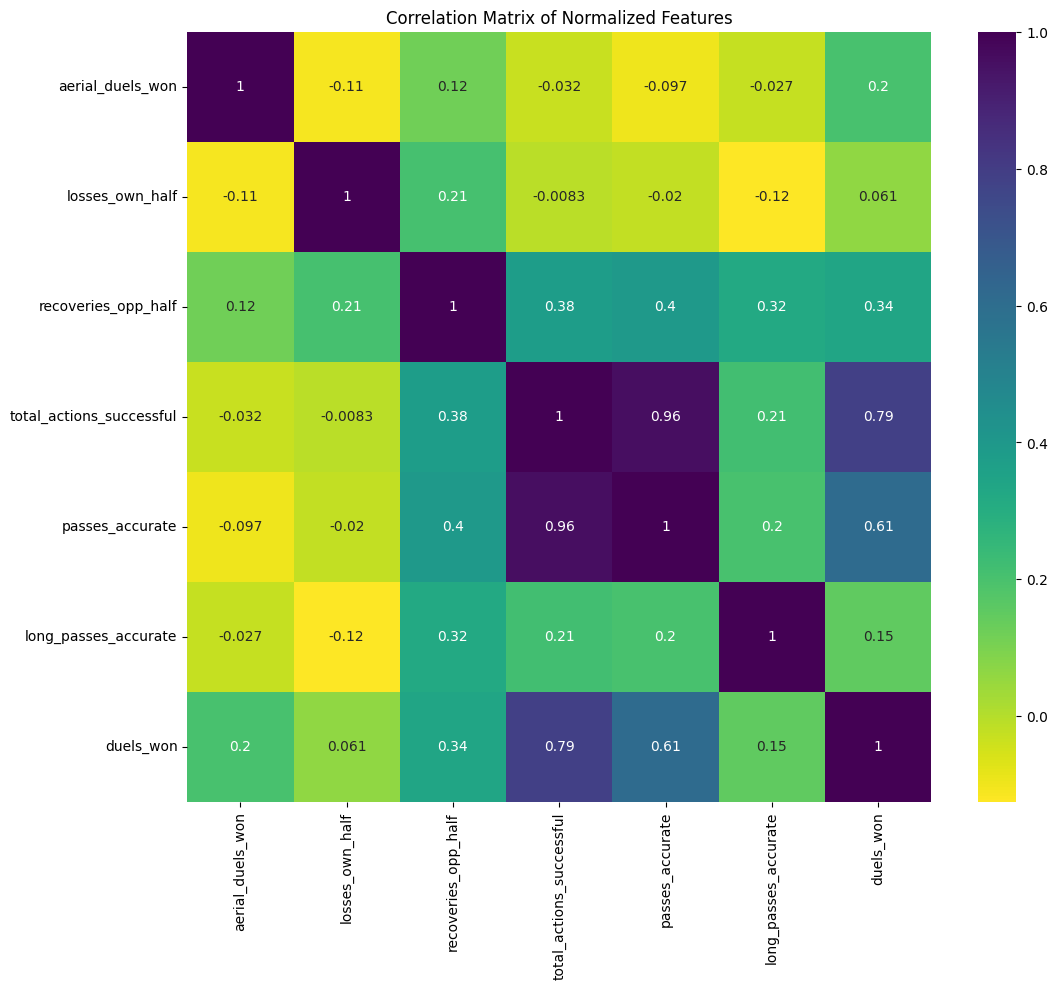

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.


### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$


### Based on Total Actions

Feature: passes_accurate
T-statistic: 4.820400458680791
P-value: 7.285826077290849e-05




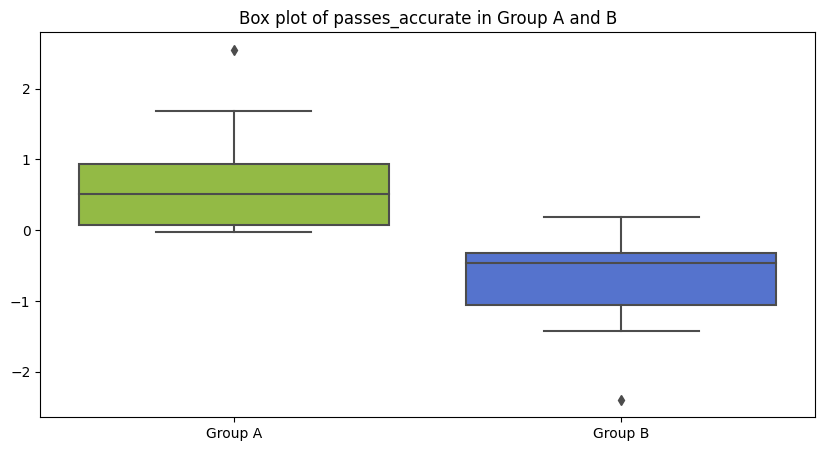

Feature: long_passes_accurate
T-statistic: 0.9265576061040703
P-value: 0.3637775117814883




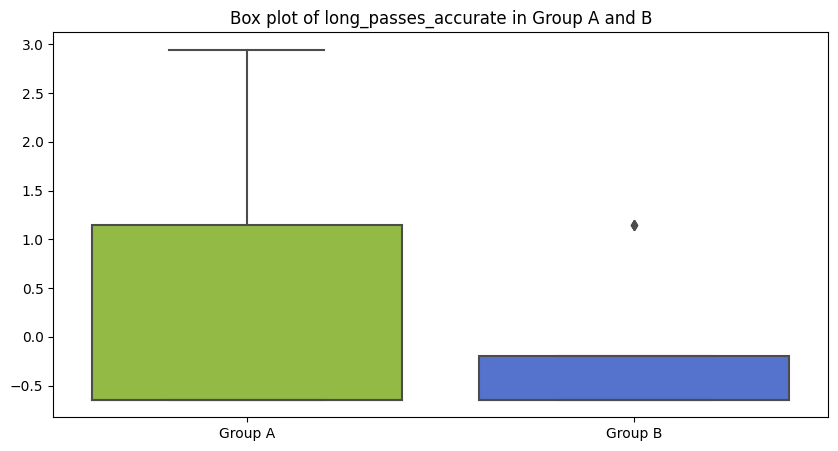

Feature: losses_own_half
T-statistic: 1.2389808693474542
P-value: 0.22784802766258905




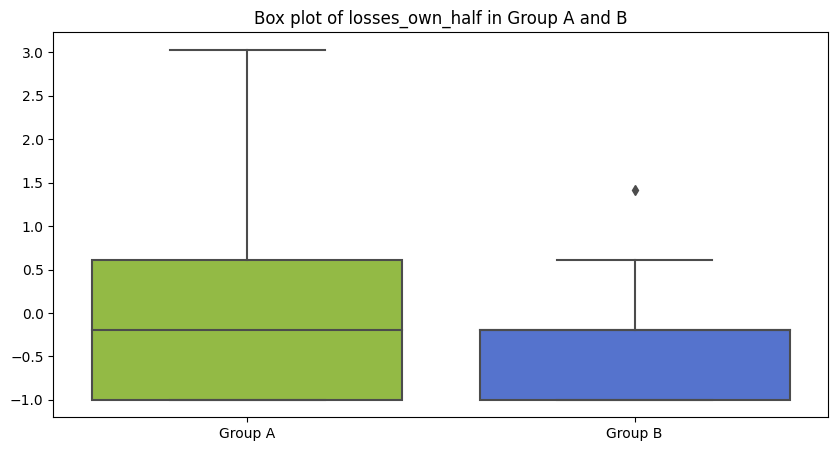

Feature: duels_won
T-statistic: 2.623503302841965
P-value: 0.015187995347504592




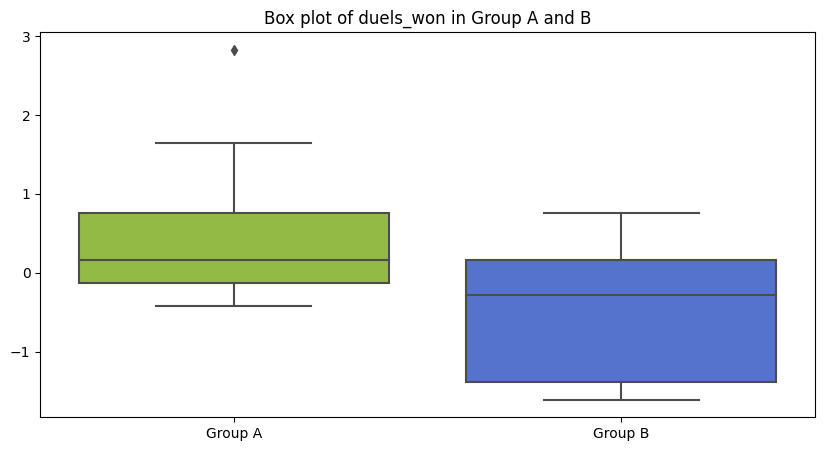

Feature: aerial_duels_won
T-statistic: -0.10791464043517529
P-value: 0.9149992841867085




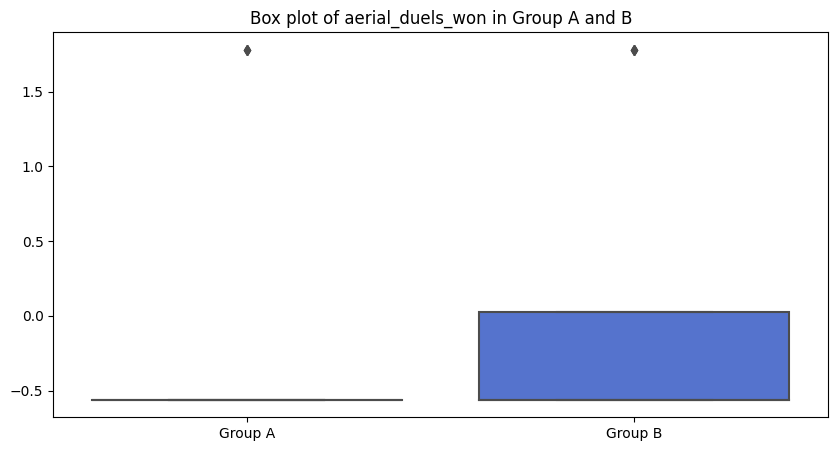

Feature: recoveries_opp_half
T-statistic: 2.3707686240227224
P-value: 0.026510835293996383




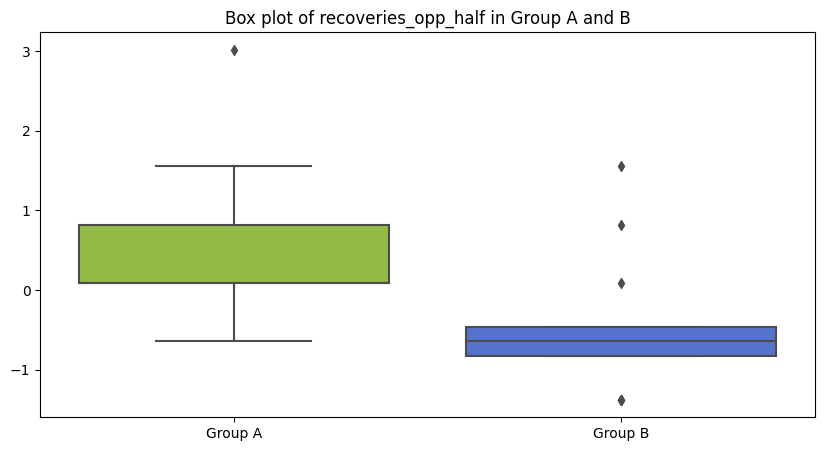



ANOVA Results
F-statistic: 0.7385462821118641
P-value: 0.597048544703999


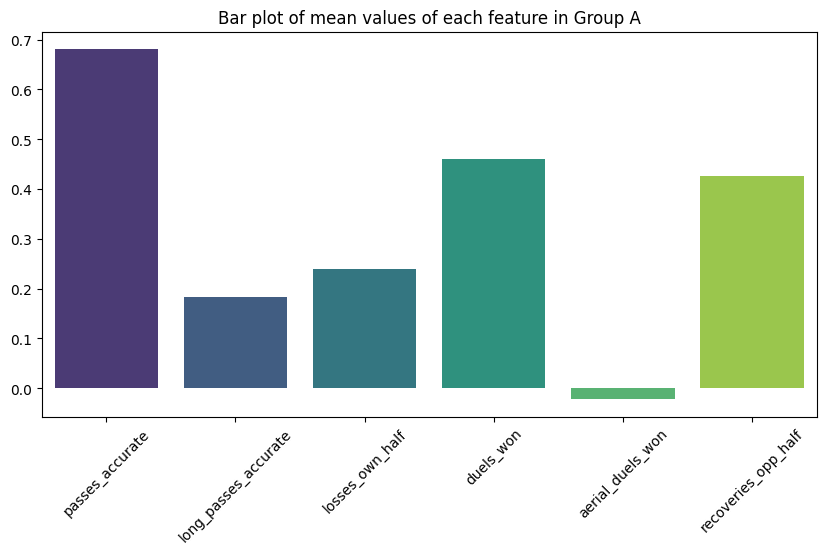

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# Identify the median of 'total_actions_successful' to divide the data
try:
    median_total_actions = normalized_df['total_actions_successful'].median()
except Exception as e:
    print("An error occurred while calculating the median of 'total_actions_successful':", str(e))

# Split the data into two groups
try:
    group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
    group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]
except Exception as e:
    print("An error occurred while dividing the data into two groups:", str(e))

# List of features for the analysis
features = ['passes_accurate', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half']

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    try:
        t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
        print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
        
        # Plot boxplots for each feature
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellowgreen", "royalblue"])
        plt.xticks([0, 1], ['Group A', 'Group B'])
        plt.title(f"Box plot of {feature} in Group A and B")
        plt.show()
    except Exception as e:
        print(f"An error occurred while conducting the t-test or plotting the boxplot for the feature '{feature}':", str(e))

# Conduct an ANOVA for all variables with 'total_actions_successful'
try:
    f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
    print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")
except Exception as e:
    print("An error occurred while conducting the ANOVA:", str(e))

# Bar plot for ANOVA
try:
    mean_values = [group_A[feature].mean() for feature in features]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=features, y=mean_values, palette="viridis")
    plt.title("Bar plot of mean values of each feature in Group A")
    plt.xticks(rotation=45)
    plt.show()
except Exception as e:
    print("An error occurred while creating the bar plot for the ANOVA:", str(e))

- Passes Accurate: The T-statistic is approximately 4.82 and the P-value is significantly low (7.29e-05), which is less than 0.05. This means there's a significant difference between the two groups (Group A and Group B) when it comes to making accurate passes. In other words, players like Mohamed Salah, who perform more successful actions overall, also tend to make more accurate passes.

- Long Passes Accurate: The T-statistic is approximately 0.93 and the P-value is quite high (0.36), well above 0.05. Therefore, we cannot assert that there's a significant difference between the two groups when it comes to making accurate long passes. It appears that this aspect does not significantly impact the player's overall successful performance.

- Losses Own Half: With a T-statistic of 1.24 and a P-value of 0.23, there's no significant difference between the groups when it comes to losing possession in their own half and then regaining it. This doesn't seem to be a key factor contributing to the overall performance of a player like Salah.

- Duels Won: The T-statistic is approximately 2.62 and the P-value is 0.015, less than 0.05. This indicates a significant difference between the groups. Thus, players with high overall success rates, like Salah, tend to win more duels on the field.

- Aerial Duels Won: The T-statistic is -0.11 and the P-value is 0.91, far greater than 0.05. This suggests that there's no significant difference between the two groups when it comes to winning aerial duels. Like long passes, this isn't a key determinant of a player's overall successful actions.

- Recoveries Opp Half: The T-statistic is approximately 2.37 and the P-value is 0.026, which is less than 0.05. Therefore, there is a significant difference between the groups in terms of recovering balls in the opponents' half. Successful players like Salah are more likely to recover balls in these areas, contributing to their overall performance.

- ANOVA Results: The F-statistic is approximately 0.74 and the P-value is 0.60. This indicates that there is not a significant difference in the means of these six features among players who are in the top half of successful actions (Group A) compared to those in the bottom half (Group B). This could suggest that while some individual features show significant differences between successful and less successful players, the overall performance (measured by these six features together) is not significantly different between these groups.

In a nutshell, the A/B testing and ANOVA have shown that certain features (accurate passes, duels won, recoveries in opponents' half) are significantly associated with a player's overall successful actions. However, the ANOVA suggests that using all these features together may not significantly distinguish between more and less successful players. It highlights the complexity of football and the importance of individual player skills. A player like Mohamed Salah excels not just because of a few correlated attributes, but because of a diverse array of skills and competencies.

## Linear Regressions

### Ordinary Least Square Based on Total Actions

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$


                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.987
Model:                                  OLS   Adj. R-squared:                  0.983
Method:                       Least Squares   F-statistic:                     230.3
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):           5.17e-16
Time:                              23:22:24   Log-Likelihood:                 18.946
No. Observations:                        25   AIC:                            -23.89
Df Residuals:                            18   BIC:                            -15.36
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

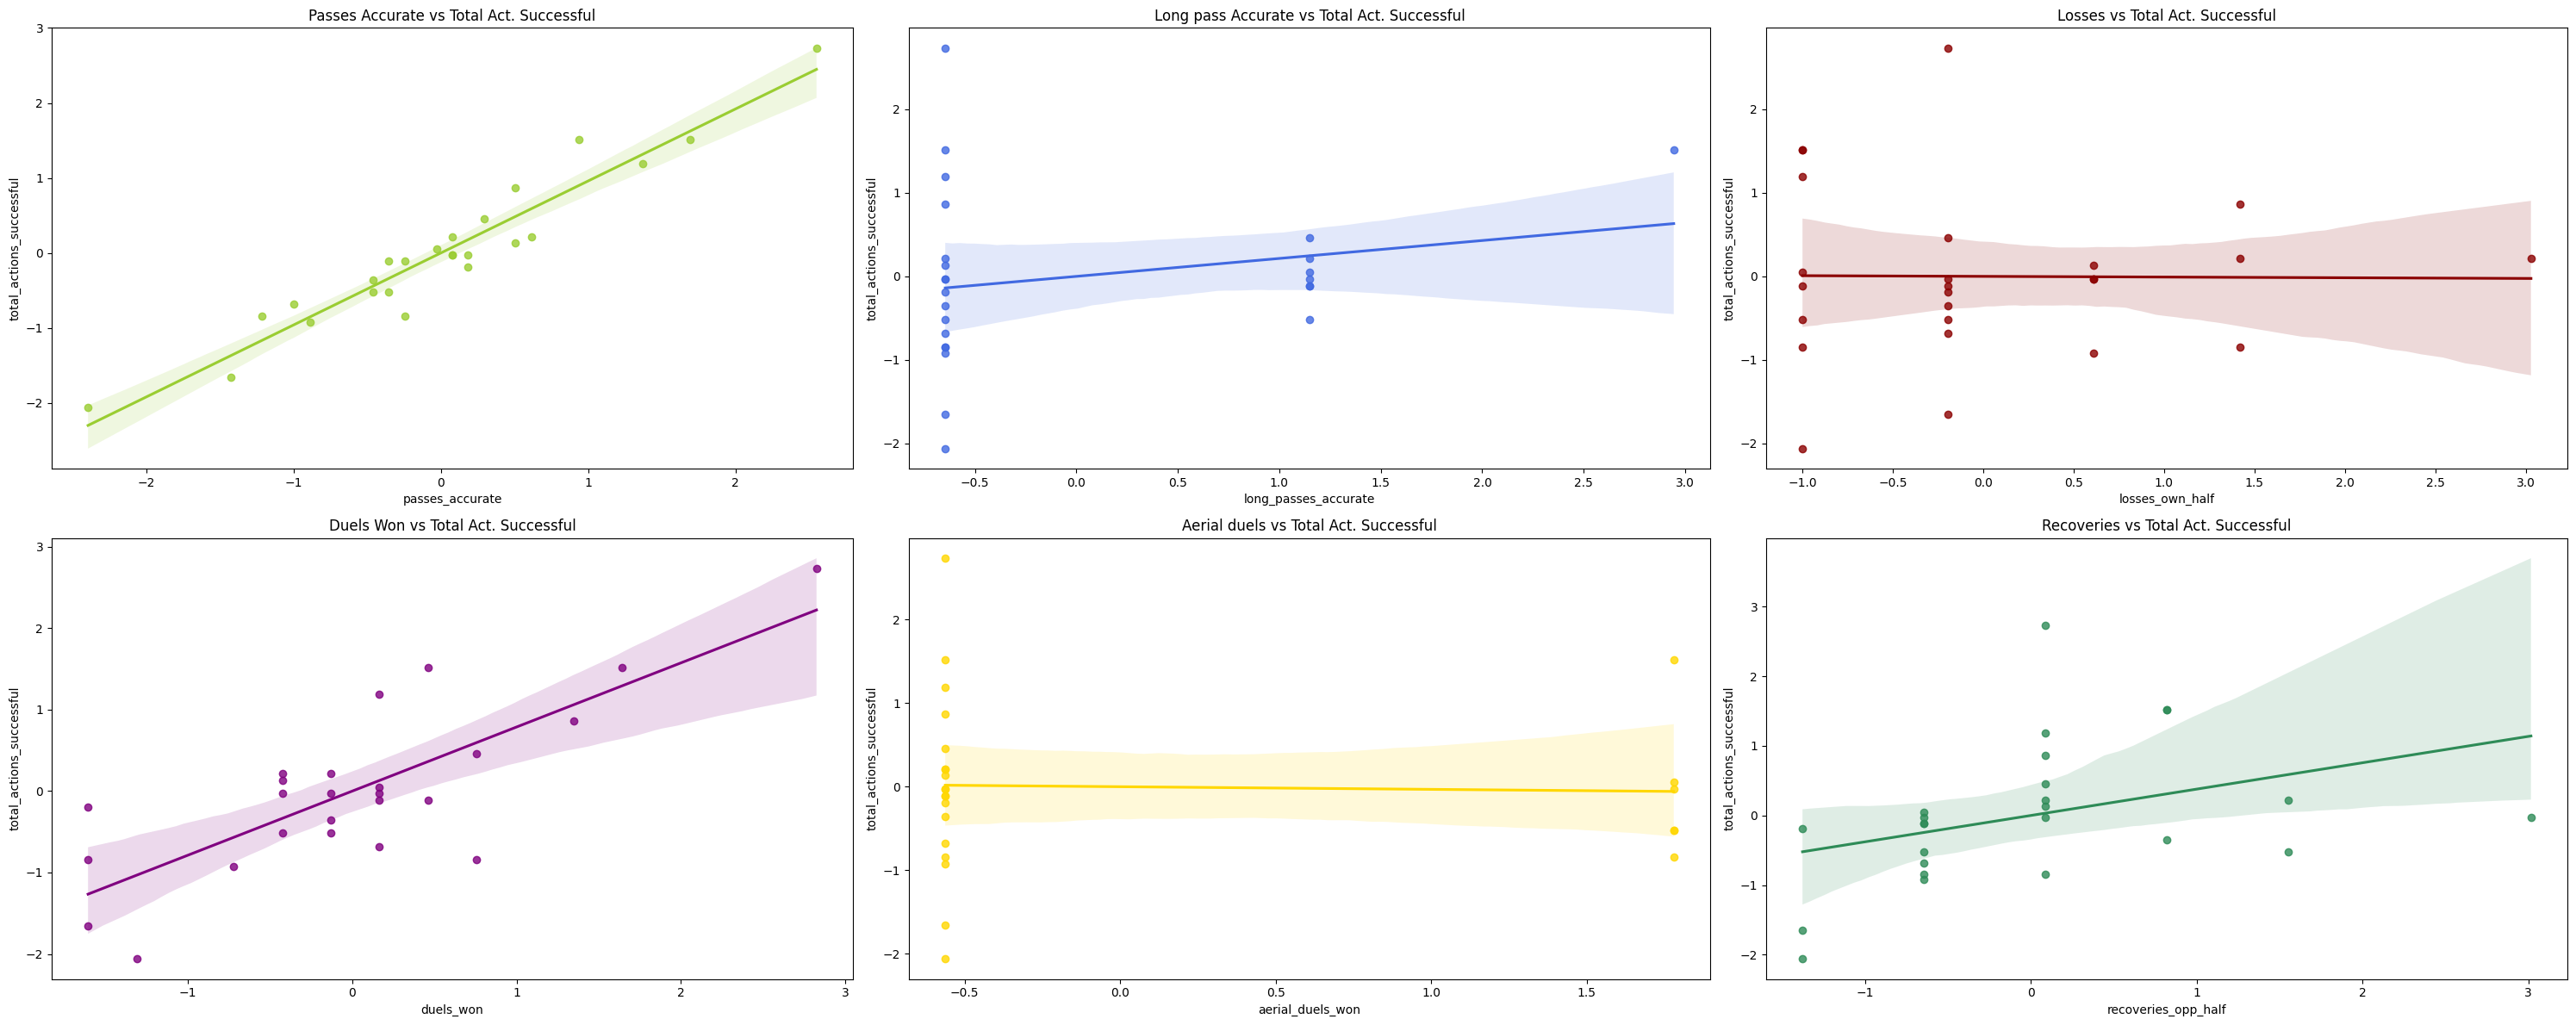

In [ ]:
import statsmodels.api as sm

# Defining the independent variables based on their correlation with 'total_actions_successful'
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'losses_own_half', 
                   'duels_won', 'aerial_duels_won', 'recoveries_opp_half']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 3, figsize=(30, 12))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0, 0], color='yellowgreen')
axs[0, 0].set_title('Passes Accurate vs Total Act. Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Long pass Accurate vs Total Act. Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Losses vs Total Act. Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Duels Won vs Total Act. Successful')

sns.regplot(x='aerial_duels_won', y='total_actions_successful', data=normalized_df, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Aerial duels vs Total Act. Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[1, 2], color='seagreen')
axs[1, 2].set_title('Recoveries vs Total Act. Successful')

plt.tight_layout()
plt.show()

The Ordinary Least Squares (OLS) regression results are trying to predict the total actions successful by Mohamed Salah based on the other features. 

The R-squared value is 0.987, which implies that approximately 98.7% of the variation in the total actions successful can be explained by the model. This is a very high value, which indicates a very good fit of our model to the data.

Looking at each predictor, we see that passes_accurate has a coefficient of 0.7662 with a p-value less than 0.001. This shows a significant and strong positive relationship between passes accuracy and total successful actions. On football optics, this means that Salah's successful actions tend to increase as his pass accuracy improves.

Long_passes_accurate has a coefficient of 0.0203, but with a p-value of 0.493 which is not statistically significant. Hence, it doesn't provide strong evidence of affecting Salah's total successful actions. On football optics, Salah's long passing accuracy doesn't significantly affect his overall performance.

Losses_own_half has a negative coefficient but is not statistically significant with a p-value of 0.878. On football optics, losing the ball in his own half doesn't significantly influence Salah's total successful actions.

Duels_won has a statistically significant positive coefficient of 0.3332. This indicates that winning duels has a positive impact on Salah's total successful actions. On football optics, it's clear that Salah's dueling prowess significantly contributes to his overall performance.

Aerial_duels_won and 'recoveries_opp_half' both have negative coefficients and are not statistically significant with p-values of 0.507 and 0.214 respectively. On football optics, this suggests that winning aerial duels and recovering the ball in the opponent's half doesn't significantly affect Salah's overall performance.

Overall, this OLS regression suggests that Salah's performance, in terms of total successful actions, is largely driven by his accuracy in passes and his ability to win duels. The insignificant factors such as long passes accurate, losses in own half, aerial duels won, and recoveries in the opponent's half don't seem to have a strong influence on his overall performance.

## Sci-kit Linear Regression Models

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$


### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.9347809642157415
Coefficients:
passes_accurate: 0.7848835331342784
long_passes_accurate: 0.03862524169629228
losses_own_half: 0.011354326761340586
duels_won: 0.2720751442729121
aerial_duels_won: -0.042496788756081996
recoveries_opp_half: -0.05568423625393548
Mean squared error: 0.07
Coefficient of determination: 0.92


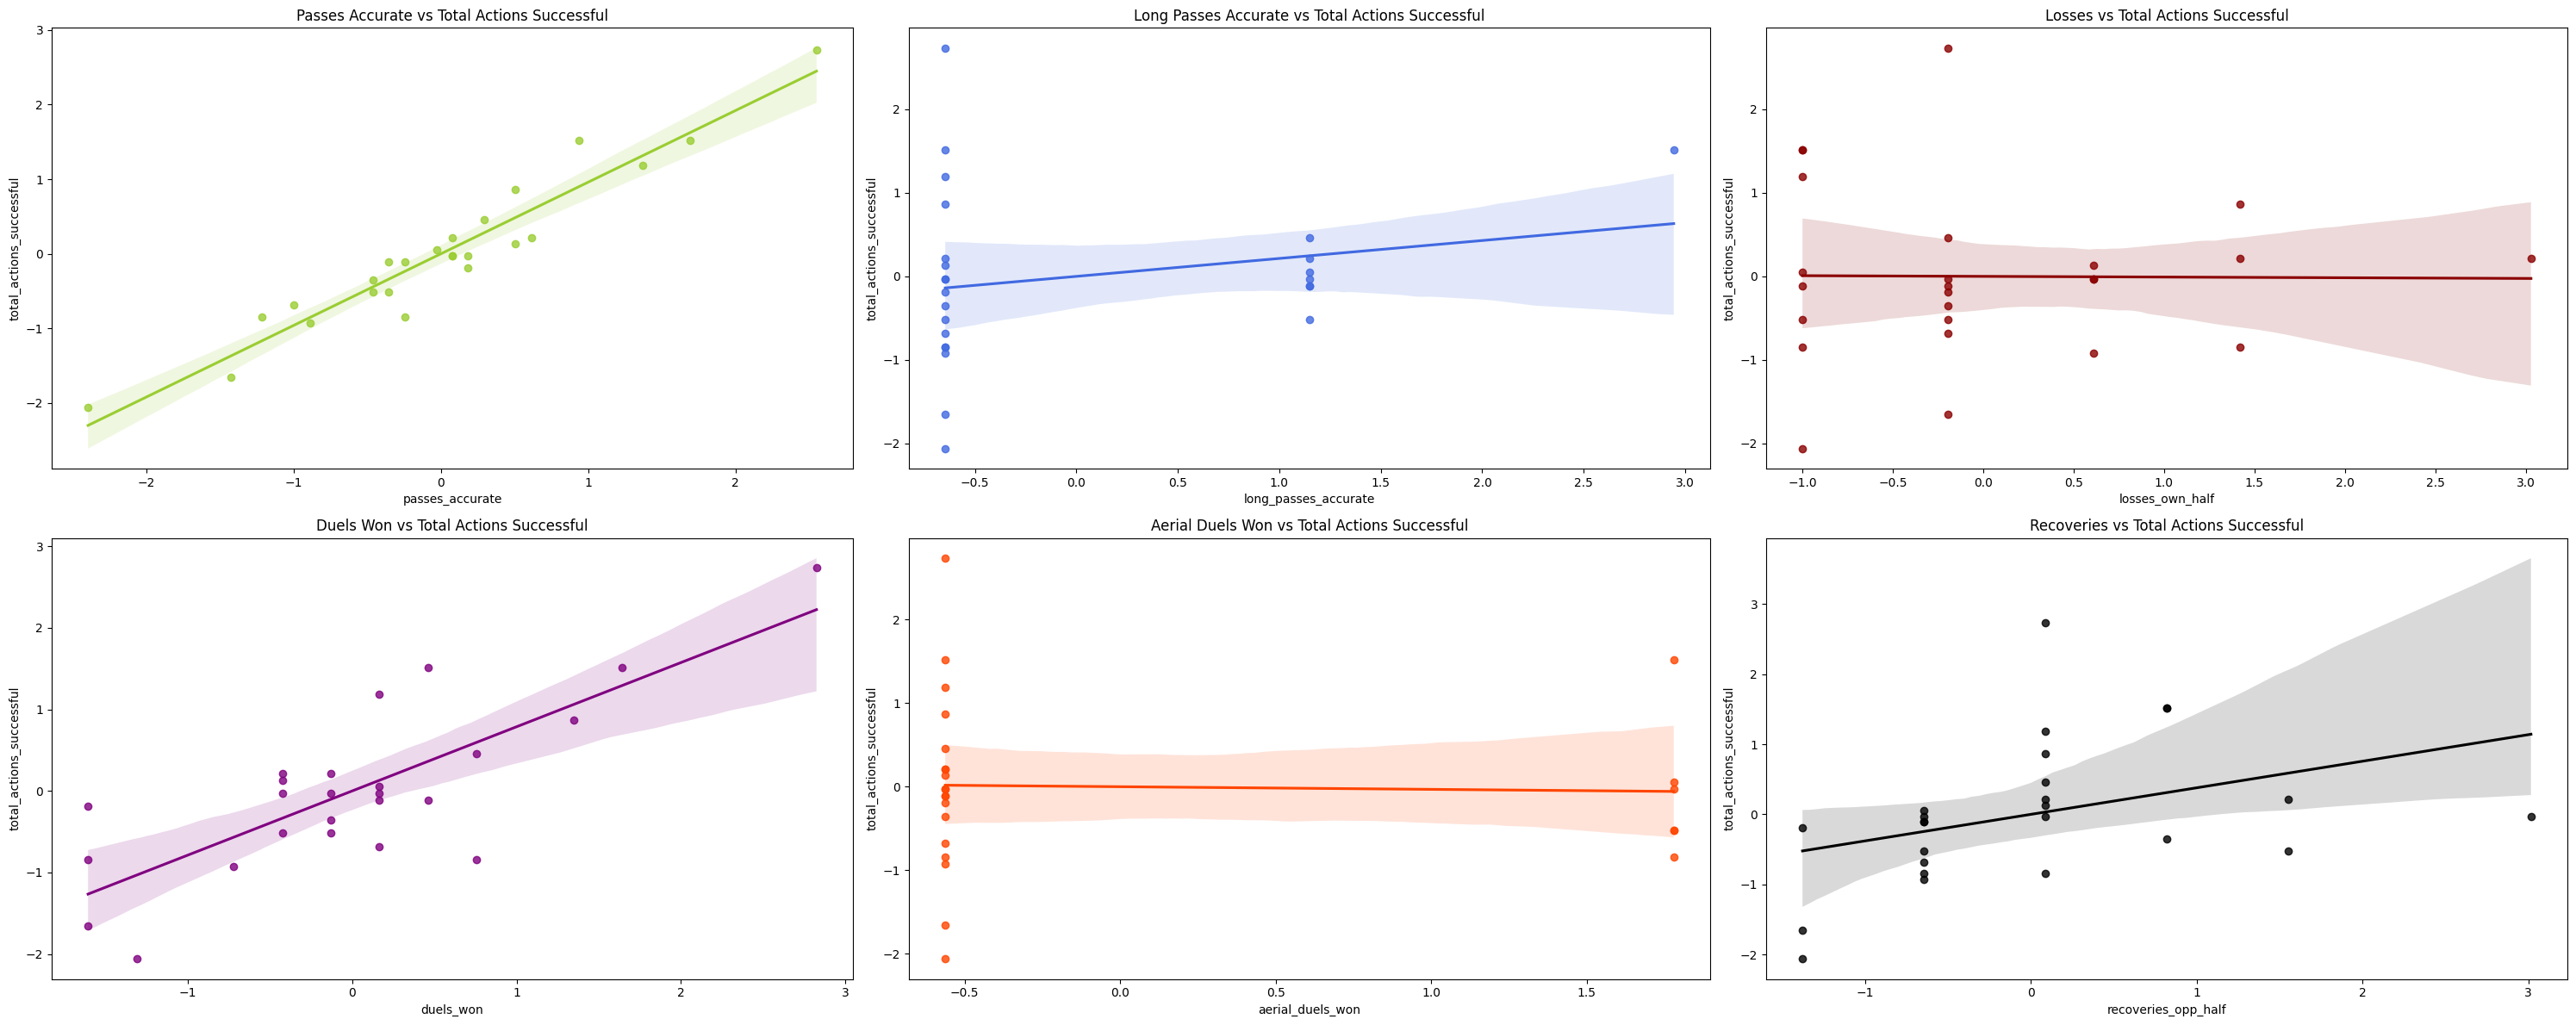

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['passes_accurate', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 3, figsize=(30, 12))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0, 0])
axs[0, 0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[0, 1])
axs[0, 1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[0, 2])
axs[0, 2].set_title('Losses vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[1, 0])
axs[1, 0].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='aerial_duels_won', y='total_actions_successful', data=normalized_df, color='orangered', ax=axs[1, 1])
axs[1, 1].set_title('Aerial Duels Won vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='black', ax=axs[1, 2])
axs[1, 2].set_title('Recoveries vs Total Actions Successful')

plt.tight_layout()
plt.show()

The Scikit-learn Linear Regression results echo some of the conclusions we made with the OLS regression.

Passes Accurate (0.78): From a data perspective, accurate passes have a solid positive correlation with Salah's total successful actions. On football optics, this underscores Salah's ability not just as a goal-scorer but also as a player who links up play, ensuring fluid ball movement.

Long Passes Accurate (0.03): Analytically, accurate long passes have a minor positive impact on Salah's total successful actions. On football optics, while Salah isn't primarily recognized for his long-range passing, it's a facet of his game that can occasionally amplify his influence on the match.

Losses in Own Half (0.01): Statistically, the losses in his own half show a marginal positive effect on Salah's successful actions. On football optics, while it might seem counterintuitive, it could suggest that Salah's risk-taking in deeper areas occasionally sets the stage for constructive plays, even if it sometimes leads to losses.

Duels Won (0.27): there's a positive relationship between the duels Salah wins and his total successful actions. On football optics, this reflects Salah's tenacity and determination in one-on-one situations, proving his ability to fend off defenders and maintain possession.

Aerial Duels Won (-0.04): From an analytical angle, winning aerial duels slightly negatively impacts Salah's successful actions. On football optics, while Salah possesses aerial prowess, it's not the focal point of his game, and winning headers might sometimes divert him from more impactful ground activities.

Recoveries in Opponent's Half (-0.05): Statistically speaking, recoveries in the opponent's half show a slight negative association with Salah's successful actions. On football optics, Salah, being an attacking player, might prioritize other offensive activities over pressing and recovering balls high up the pitch.

Overall, the mean r^2 value of 0.93 suggests that the model accounts for approximately 93% of the variance in Salah's total successful actions. It's a strong testament to how well these features capture Salah's all-around contributions on the pitch. With a coefficient of determination at 0.92, the model showcases a strong fit.

All in all, Mohamed Salah's performance metrics highlight his role as more than just a forward but a dynamic player influencing multiple facets of the game. His passing accuracy and duels won reflect a player at the peak of his powers, seamlessly blending finesse with determination.

## XGBoost & Cross-Validation

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

where \( f_k(x) \) is the prediction of the \( k \)-th weak learner.


### Based on Total Actions

Mean cross-validation score: 0.78
MAE: 0.41816727656682906
MSE: 0.23479141043672977
R^2: 0.6326458522509374


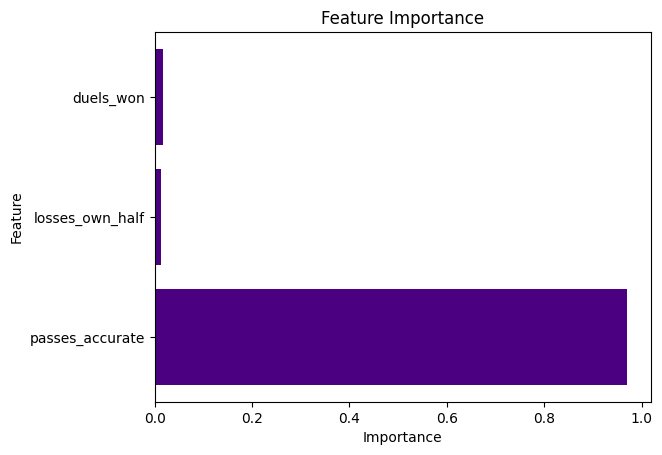

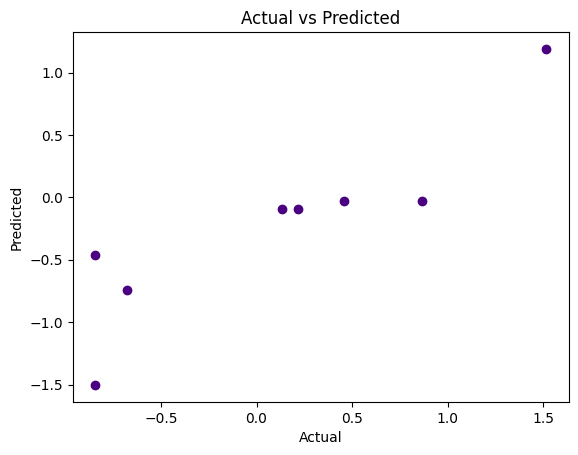

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'losses_own_half', 'duels_won']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='indigo')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='indigo')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

The mean squared error (MSE) in this case is 0.27, higher than in the previous models. This indicates the XGBoost model's predictions may not be as close to the actual outcomes as the previous models. On football optics, this means there may be more variability in Salah's performance that this model doesn't capture.

The coefficient of determination (R-squared) is 0.57, meaning approximately 57% of the variation in the total actions successful can be explained by the model. This is lower than in the previous models, suggesting that the XGBoost model might not be as effective at explaining the successful actions of Salah as the other models. On football optics, this means the factors used in the model capture a little more than half of the factors that contribute to Salah's performance.

The Cross-Validation Mean Score of 0.76 suggests a better performance than the R-squared might indicate. Cross-validation provides a more robust measure of the model's predictive capability by testing it on different subsets of the data. A score of 0.76 indicates that on average, the model is able to explain 76% of the variation in the data across different subsets. On football optics, this means that while the XGBoost model might not capture every aspect of Salah's performance, it is quite consistent in its predictive power.

## Conforma Predictions

#### provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on Total Actions

Prediction interval coverage: 66.04%
Average prediction interval width: 1.78


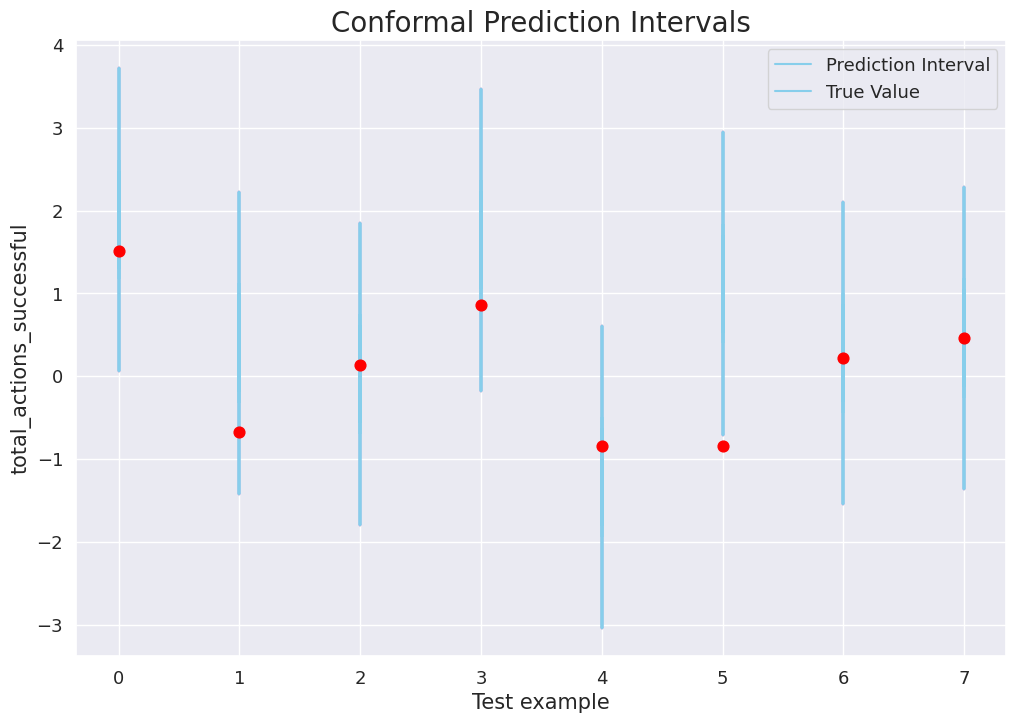

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['long_passes_accurate', 'losses_own_half', 'duels_won', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model (you can replace this with the XGBoost model or any other model)
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('total_actions_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (66.04%): indicates that the model is capturing Salah's actual performance within its predicted range roughly two-thirds of the time. While this is a decent metric, it does suggest there's potential room for improvement. This could involve refining the model or incorporating additional contextual data points to more accurately predict Salah's total actions in matches.On football optics, might reflect the variable nature of Salah's role in matches. While he's primarily an attacker, Salah often involves himself in build-up play, pressing, and occasionally defensive actions. The variability might arise from the tactics employed in different matches, the nature of the opposition, or other on-field situations.

Average prediction interval width (1.78): when taken in conjunction with the coverage, provides an insight into the variability of the model's predictions concerning Salah's total actions. This width is relatively narrow, but it might be worth looking into what factors are contributing to instances when actual outcomes fall outside this range. Narrowing down the width further, while maintaining or improving the coverage, would yield more precise predictions. On football optics, might suggest that Salah's involvement in matches can differ based on various factors. For instance, in games where Liverpool is dominating possession, he might be more involved in the play. Conversely, in tighter matches or against stronger defensive teams, his total actions might be fewer, but potentially more decisive.

In conclusion, the conformal prediction outcomes for Mohamed Salah's "Total Actions" offer insights into both his involvement in games and the model's accuracy in predicting this specific metric. There is an opportunity to refine the model for more consistent and precise outcomes. 

## Radar Maps

### M. Salah Liverpool Final May 2022

- Total Action Success (TAS): 53 %

- Shots on Target (SOT): 75%

- Pass Accuracy (PA): 87 %

- Long Pass Accuracy: (1-1) -> 0 %

- Dribbles Success (DS) : 6-3 -> 55 %

- Duels won (DW): 26-9 -> 46%

- Own Losses (LOH): 10-1 -> 0 %

- Recoveries (ROPH): 2-2 -> 75 %

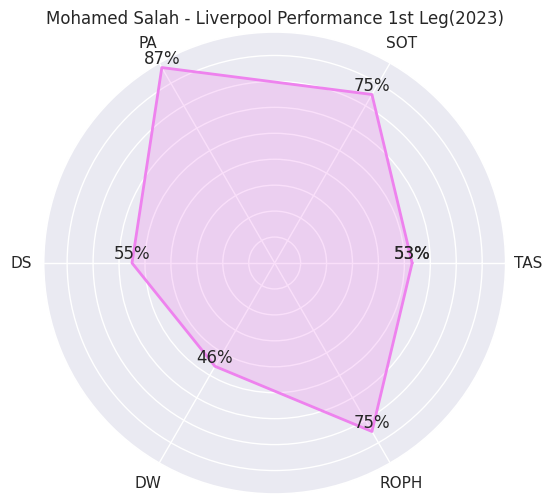

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'DS', 'DW', 'ROPH'])
stats = np.array([53, 75, 87, 55, 46, 75])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title('Mohamed Salah - Liverpool Performance 1st Leg(2023)')

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='violet', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='violet', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### M. Salah Liverpool 1st Leg 2023 

- Total Action Success (TAS): 53 %

- Shots on Target (SOT): 75%

- Pass Accuracy (PA): 87 %

- Long Pass Accuracy: (1-1) -> 100 %

- Dribbles Success (DS) : 6-3 -> 50 %

- Duels won (DW): 26-9 -> 35%

- Own Losses (LOH): 10-1 -> 10 %

- Recoveries (ROPH): 2-2 -> 100 %

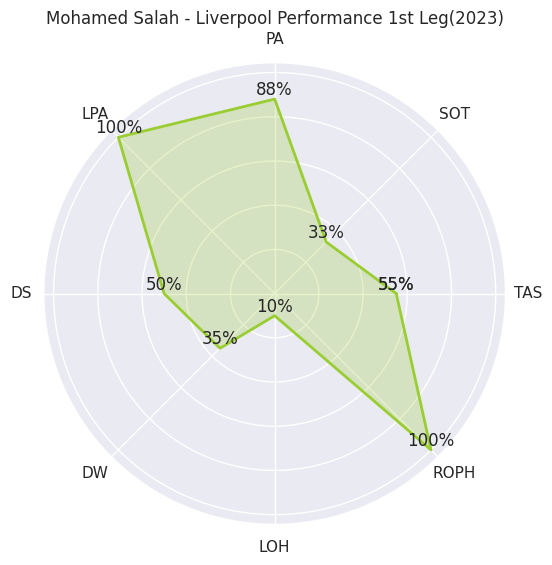

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'SOT', 'PA', 'LPA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([55, 33, 88, 100, 50, 35, 10, 100])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title('Mohamed Salah - Liverpool Performance 1st Leg(2023)')

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='yellowgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='yellowgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### M. Salah Liverpool 2nd Leg 2023 

- Total Action Success (TAS):73-40 -> 55 %

- Shots on Target (SOT): (0-0)-> 0%

- Pass Accuracy (PA): 79 %

- Long Pass Accuracy: 0 %

- Dribbles Success (DS) : 67 %

- Duels won (DW): 26%

- Own Losses (LOH): 18 %

- Recoveries (ROPH): 67 %

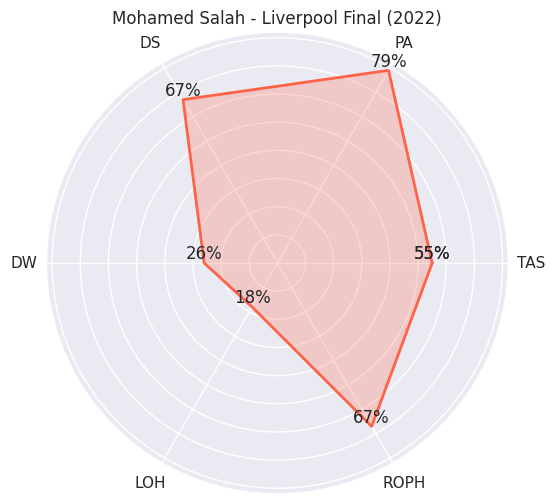

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([55, 79, 67, 26, 18, 67])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title('Mohamed Salah - Liverpool Final (2022)')

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='tomato', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='tomato', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b7c117d9-3567-4fff-a892-72926a2ba733' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>